# Tratamiento

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

warnings.filterwarnings("ignore")

## Configuro la visualización de mis datasets
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
### Leer el dataset y un primer vistazo 
df_loan_apli = pd.read_csv('./data/application_data.csv')
df_loan_apli.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Separación en train y test

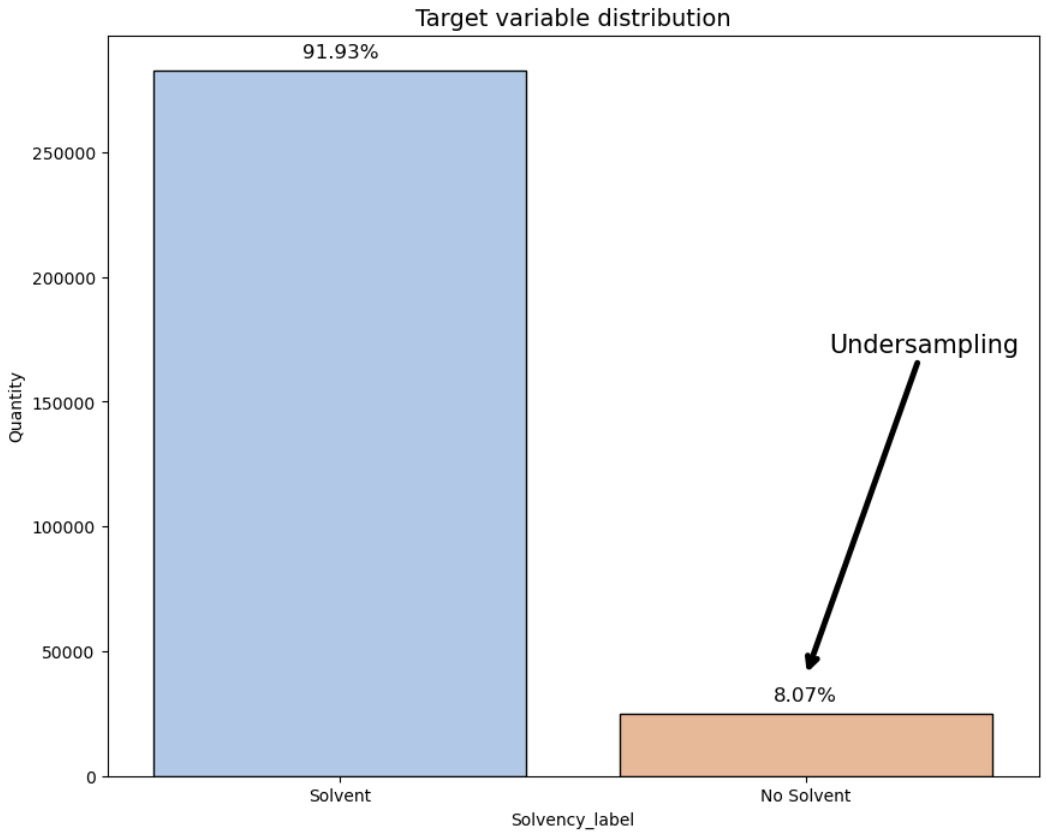

ref: NOTEBOOK: 01_Exploración_general

In [3]:
from sklearn.model_selection import train_test_split

## Como tenemos un dataset con undersampling, vamos aplicar stratify para que la proporción se 
## mantenga
x_train, x_test, y_train, y_test = train_test_split(df_loan_apli.drop('TARGET', axis=1),
                                                    df_loan_apli['TARGET'],
                                                    stratify=df_loan_apli['TARGET'],
                                                    test_size=0.2)

df_loan_train = pd.concat([x_train, y_train], axis=1)
df_loan_test = pd.concat([x_test, y_test], axis=1)

In [4]:
## Comprobación de que se han mantenido las distribuciones 
print('== Train\n', df_loan_train['TARGET'].value_counts(normalize=True))
print('== Test\n', df_loan_test['TARGET'].value_counts(normalize=True))
df_loan_train.head()

== Train
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
== Test
 TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
134455,255952,Cash loans,F,N,Y,1,67500.0,135000.0,10953.0,135000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-14896,-2046,-7375.0,-4092,NaN,1,1,1,1,1,0,Laborers,3.0,2,2,SUNDAY,14,0,0,0,0,0,0,Postal,NaN,0.653067,NaN,0.0227,NaN,0.9801,NaN,NaN,0.00,0.1034,0.0417,NaN,NaN,NaN,0.0167,NaN,0.0000,0.0231,NaN,0.9801,NaN,NaN,0.0000,0.1034,0.0417,NaN,NaN,NaN,0.0174,NaN,0.0000,0.0229,NaN,0.9801,NaN,NaN,0.00,0.1034,0.0417,NaN,NaN,NaN,0.0170,NaN,0.0000,NaN,block of flats,0.0131,"Stone, brick",No,0.0,0.0,0.0,0.0,-246.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
298103,445362,Cash loans,F,N,Y,0,202500.0,526500.0,14904.0,526500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-20496,365243,-9655.0,-3927,NaN,1,0,0,1,0,0,NaN,2.0,2,2,FRIDAY,8,0,0,0,0,0,0,XNA,NaN,0.390790,0.819318,0.1485,0.1823,0.9866,0.8164,0.0839,0.16,0.1379,0.3333,0.3750,0.0000,0.1210,0.1520,0.0000,0.0000,0.1513,0.1892,0.9866,0.8236,0.0846,0.1611,0.1379,0.3333,0.3750,0.0000,0.1322,0.1584,0.0,0.0000,0.1499,0.1823,0.9866,0.8189,0.0844,0.16,0.1379,0.3333,0.3750,0.000,0.1231,0.1547,0.0000,0.0000,reg oper account,block of flats,0.1654,Panel,No,1.0,0.0,1.0,0.0,-1506.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,1
14343,116731,Cash loans,M,Y,Y,0,270000.0,1031053.5,34204.5,783000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.006233,-17143,-476,-2549.0,-331,14.0,1,1,0,1,0,0,Laborers,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,NaN,0.566456,0.477649,0.0577,0.0271,0.9737,0.6396,0.0102,0.00,0.1034,0.1458,0.1875,0.0865,0.0466,0.0443,0.0019,0.0299,0.0336,0.0271,0.9737,0.6537,0.0031,0.0000,0.0690,0.1250,0.1667,0.0652,0.0285,0.0255,0.0,0.0175,0.0583,0.0271,0.9737,0.6444,0.01

In [4]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), dpi=90)
    
    # Contar nulos antes de cualquier transformación
    count_null = df[col_name].isnull().sum()

    if isContinuous:
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        ## Creamos una copia temporal para poder visualizar los nulos
        col_temp = df[col_name].fillna('NaN')
        sns.countplot(col_temp, order=sorted(col_temp.unique()), color='#5975A4', saturation=1, ax=ax1)
    
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(f"{col_name} - Numero de nulos: {count_null}")
    plt.xticks(rotation=90)

    if isContinuous:
        data_no_na = df[[col_name, target]].dropna()  # Excluye filas con NaN en las columnas relevantes
        sns.boxplot(x=target, y=col_name, data=data_no_na, ax=ax2)
        ## En Seaborn el eje X debe ser categórico, por eso antesn no dejaba graficar ###

        ax2.set_ylabel('')
        ax2.set_title(f"{col_name} by {target}")
    else:
        # Usar la copia temporal también para agrupar
        col_temp = df[col_name].fillna('NaN')
        data = df.groupby(col_temp)[target].value_counts(normalize=True).to_frame('proportion').reset_index()
        data.columns = [col_name, target, 'proportion']
        sns.barplot(x=col_name, y='proportion', hue=target, data=data, saturation=1, ax=ax2)
        ax2.set_ylabel(f"{target} fraction")
        ax2.set_title(target)
    plt.xticks(rotation=90)
    ax2.set_xlabel(col_name)

    plt.tight_layout()


In [5]:
import funciones

lista_categoricas, other = funciones.dame_variables_categoricas(df_loan_train, 100)
lista_numericas = set(df_loan_train.columns) - set(lista_categoricas)

lista_int = df_loan_train.select_dtypes(include='int64').columns
print(lista_int)
print(lista_numericas)

/Users/josetunon/Desktop/ciencia_de_datos/aprendizaje_automatico/practica1_EDA
Index(['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 

In [ ]:
### Distribuación de las variables respecto al target
for i in lista_int:
    if (df_loan_train[i].dtype ==float) and (i!= 'TARGET'):
        ### en python puro se reocomienda usar 'and', '&' es un operador de pandas
        plot_feature(df_loan_train, col_name=i, isContinuous=True, target='TARGET')
    elif  i!='TARGET':
        plot_feature(df_loan_train, col_name=i, isContinuous=False, target='TARGET')
    
    plt.show()

KeyboardInterrupt: 

In [82]:
print(df_loan_train.shape)
print(df_loan_train[lista_categoricas].isnull().sum())

(246008, 122)
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1033
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                77107
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            168093
HOUSETYPE_MODE                123203
WALLSMATERIAL_MODE            124935
EMERGENCYSTATE_MODE           116410
dtype: int64
